In [68]:
import pandas as pd
import numpy as np
import cv2 as cv
from PIL import Image
import scipy.misc
import imageio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

In [69]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 21 15:16:06 2018
@author: Murali
"""

import cv2
import numpy as np
from scipy import ndimage
from scipy.misc import imresize


def preprocess_signature(img, canvas_size, img_size=(170, 242), input_size=(150, 220)):
    img = img.astype(np.uint8)
    centered = normalize_image(img, canvas_size)
    inverted = 255 - centered
    resized = resize_image(inverted, img_size)
    cropped = crop_center(resized, input_size)
    return cropped


def normalize_image(img, size=(840, 1360)):
    """ Centers an image in a pre-defined canvas size, and remove
    noise using OTSU's method.
    :param img: The image to be processed
    :param size: The desired canvas size
    :return: The normalized image
    """

    max_r, max_c = size

    # 1) Crop the image before getting the center of mass

    # Apply a gaussian filter on the image to remove small components
    # Note: this is only used to define the limits to crop the image
    blur_radius = 2
    blurred_image = ndimage.gaussian_filter(img, blur_radius)

    # Binarize the image using OTSU's algorithm. This is used to find the center
    # of mass of the image, and find the threshold to remove background noise
    threshold, binarized_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find the center of mass
    r, c = np.where(binarized_image == 0)
    r_center = int(r.mean() - r.min())
    c_center = int(c.mean() - c.min())

    # Crop the image with a tight box
    cropped = img[r.min(): r.max(), c.min(): c.max()]

    # 2) Center the image
    img_r, img_c = cropped.shape

    r_start = max_r // 2 - r_center
    c_start = max_c // 2 - c_center

    # Make sure the new image does not go off bounds
    # Case 1: image larger than required (height):  Crop.
    # Emit a warning since we don't want this for the signatures in the WD dataset (OK for feature wi)
    if img_r > max_r:
        print ('Warning: cropping image. The signature should be smaller than the canvas size')
        r_start = 0
        difference = img_r - max_r
        crop_start = difference // 2
        cropped = cropped[crop_start:crop_start + max_r, :]
        img_r = max_r
    else:
        extra_r = (r_start + img_r) - max_r
        # Case 2: centering exactly would require a larger image. relax the centering of the image
        if extra_r > 0:
            r_start -= extra_r
        if r_start < 0:
            r_start = 0

    # Case 2: image larger than required (width). Crop.
    if img_c > max_c:
        print ('Warning: cropping image. The signature should be smaller than the canvas size')
        c_start = 0
        difference = img_c - max_c
        crop_start = difference // 2
        cropped = cropped[:, crop_start:crop_start + max_c]
        img_c = max_c
    else:
        extra_c = (c_start + img_c) - max_c
        if extra_c > 0:
            c_start -= extra_c
        if c_start < 0:
            c_start = 0

    normalized_image = np.ones((max_r, max_c), dtype=np.uint8) * 255
    # Add the image to the blank canvas
    normalized_image[r_start:r_start + img_r, c_start:c_start + img_c] = cropped

    # Remove noise - anything higher than the threshold. Note that the image is still grayscale
    normalized_image[normalized_image > threshold] = 255

    return normalized_image


def remove_background(img):
        """ Remove noise using OTSU's method.
        :param img: The image to be processed
        :return: The normalized image
        """

        img = img.astype(np.uint8)
        # Binarize the image using OTSU's algorithm. This is used to find the center
        # of mass of the image, and find the threshold to remove background noise
        threshold, _ = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Remove noise - anything higher than the threshold. Note that the image is still grayscale
        img[img > threshold] = 255

        return img


def resize_image(image, new_size, interpolation='bilinear'):
    """ Crops an image to the desired size without stretching it.
    :param image: The image to be cropped
    :param new_size: The desired size
    :param interpolation: The interpolation method ('nearest', 'bilinear', 'bicubic')
    :return: The cropped image
    """
    height, width = new_size

    # Check which dimension needs to be cropped
    # (assuming the new height-width ratio may not match the original size)
    width_ratio = float(image.shape[1]) / width
    height_ratio = float(image.shape[0]) / height
    if width_ratio > height_ratio:
        resize_height = height
        resize_width = int(round(image.shape[1] / height_ratio))
    else:
        resize_width = width
        resize_height = int(round(image.shape[0] / width_ratio))

    # Resize the image (will still be larger than new_size in one dimension)
    image = imresize(image.astype(np.float32), (resize_height, resize_width), interp=interpolation)

    # Crop to exactly the desired new_size, using the middle of the image:
    if width_ratio > height_ratio:
        start = int(round((resize_width-width)/2.0))
        return image[:, start:start+width]
    else:
        start = int(round((resize_height-height)/2.0))
        return image[start:start+height, :]


def crop_center(img, input_shape):
    img_shape = img.shape
    start_y = (img_shape[0] - input_shape[0]) // 2
    start_x = (img_shape[1] - input_shape[1]) // 2
    cropped = img[start_y: start_y + input_shape[0], start_x:start_x + input_shape[1]]
    return cropped

ImportError: cannot import name 'imresize' from 'scipy.misc' (/home/chen/anaconda3/lib/python3.7/site-packages/scipy/misc/__init__.py)

In [31]:
trainGTTable = pd.read_csv("../train.csv")
valGTTable = pd.read_csv("../val.csv")

In [32]:
class FooError(ValueError):
    pass

In [33]:
class segment(object):
    def __init__(self, xmin, xmax, ymin, ymax):
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
    

In [42]:
def distansTransform(pwd):
    img = Image.open(pwd)
    return nd.morphology.distance_transform_edt(img)

In [43]:
def showImg(pwd):
    img = Image.open(pwd)
    plt.imshow(img)

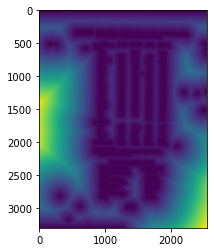

In [50]:
pwd = '../images/1675_199.png'

In [66]:
def transformPic(typeOfData):
    if(typeOfData == 'train'):
        table = trainGTTable
        newpwd = '../train/'
    elif(typeOfData == 'val'):
        table = valGTTable
        newpwd = '../val/'
    else:
        raise FooError('invalid typeOfData')
    for name in table['file']:
        pwd = "../images/" + str(name)
        transformedImg = distansTransform(pwd)
        imageio.imwrite(newpwd+name, transformedImg)

In [67]:
transformPic('val')

Lossy conversion from float64 to uint8. Range [0.0, 479.2128963206228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 479.2128963206228]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1133.5188573640935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 1133.5188573640935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 678.8519720822795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 693.3426281428252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 693.3426281428252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8.

Lossy conversion from float64 to uint8. Range [0.0, 479.5518741491894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 633.1903347335617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 633.1903347335617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 715.0279714808365]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 665.9737232053529]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 997.8662234989217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 553.2820257337121]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. R